<a href="https://colab.research.google.com/github/marielaAriass/EstadisticaMultivariada/blob/main/Ejercicios/EM_ValidacionSupuestos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Código en R

In [1]:
%load_ext rpy2.ipython

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘svglite’

trying URL 'https://cran.rstudio.com/src/contrib/svglite_2.2.1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/kableExtra_1.4.0.tar.gz'

The downloaded source packages are in
	‘/tmp/Rtmp1Wjcup/downloaded_packages’


In [6]:
%%R
## Cargar datos
yp <-c(6.40, 15.05, 18.75, 30.25, 44.85, 48.85, 51.55, 61.50, 100.44, 111.42)
x1 <-c(1.32, 2.69, 3.56, 4.41, 5.35, 6.20, 7.12, 8.87, 9.80, 10.65)
x2 <-c(1.15, 3.40, 4.10, 8.75, 14.82, 15.15, 15.32, 18.18, 35.19, 40.40)
datos<-data.frame(yp, x1, x2)
kable(datos, caption = "Factores que influyen en el tiempo de coccion segun diferentes niveles de ancho del horno y diferentes temperaturas")



Table: Factores que influyen en el tiempo de coccion segun diferentes niveles de ancho del horno y diferentes temperaturas

|     yp|    x1|    x2|
|------:|-----:|-----:|
|   6.40|  1.32|  1.15|
|  15.05|  2.69|  3.40|
|  18.75|  3.56|  4.10|
|  30.25|  4.41|  8.75|
|  44.85|  5.35| 14.82|
|  48.85|  6.20| 15.15|
|  51.55|  7.12| 15.32|
|  61.50|  8.87| 18.18|
| 100.44|  9.80| 35.19|
| 111.42| 10.65| 40.40|


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.5.2.tar.gz'
Content type 'application/x-gzip' length 3580451 bytes (3.4 MB)
downloaded 3.4 MB


The downloaded source packages are in
	‘/tmp/Rtmp1Wjcup/downloaded_packages’


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/patchwork_1.3.2.tar.gz'
Content type 'application/x-gzip' length 3322521 bytes (3.2 MB)
downloaded 3.2 MB


The downloaded source packages are in
	‘/tmp/Rtmp1Wjcup/downloaded_packages’


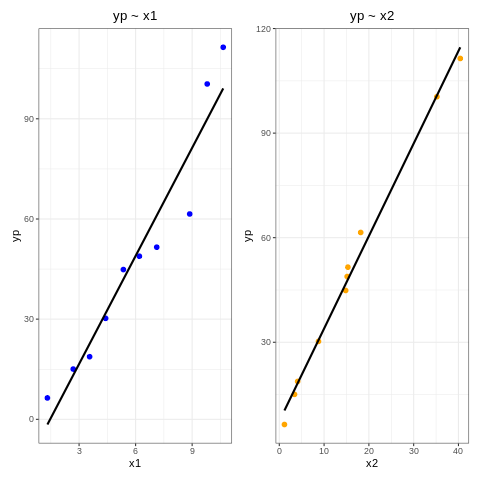

In [11]:
%%R
## Visualizar los datos
# Install and load patchwork if not already installed -> Para usar + en ggplot
if (!requireNamespace("patchwork", quietly = TRUE)) {
    install.packages("patchwork")
}
library(patchwork)

g1 <- ggplot(data = datos, mapping = aes(x = x1, y = yp)) +
  geom_point(color = "blue", size = 2) +
  labs(title  =  'yp ~ x1', x  =  'x1') +
  geom_smooth(method = "lm", se = FALSE, color = "black") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

g2 <- ggplot(data = datos, mapping = aes(x = x2, y = yp)) +
  geom_point(color = "orange", size = 2) +
  labs(title  =  'yp ~ x2', x  =  'x2') +
  geom_smooth(method = "lm", se = FALSE, color = "black") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

g1 + g2

In [12]:
%%R
## Multicolinealidad
variables <- data.frame(x1,x2)
m_cor <- cor(variables,method = "pearson")
m_cor

          x1        x2
x1 1.0000000 0.9375592
x2 0.9375592 1.0000000


In [14]:
%%R
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/corrplot_0.95.tar.gz'
Content type 'application/x-gzip' length 3745190 bytes (3.6 MB)
downloaded 3.6 MB


The downloaded source packages are in
	‘/tmp/Rtmp1Wjcup/downloaded_packages’
corrplot 0.95 loaded


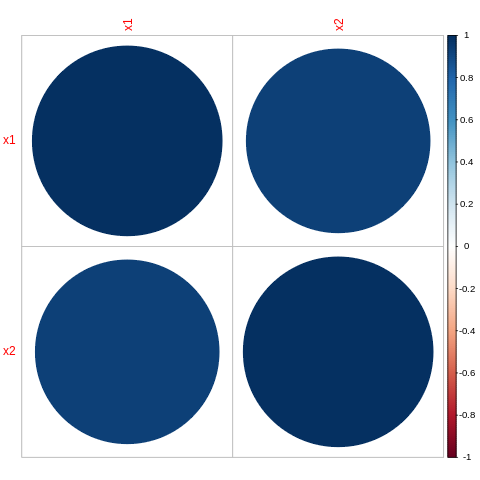

In [17]:
%%R
## Grafica de correlacion
corrplot(m_cor)

In [19]:
%%R
## Construir 2 modelos
#Modelo 1
modelo1 <- lm(formula = yp ~ x1 + x2, data = datos)

summary(modelo1)

# El intercepto parece no ser significativo. Vamos a construir un segundo modelo usando solo x2 que parece ser más significativa.


Call:
lm(formula = yp ~ x1 + x2, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8475 -0.3438  0.0043  0.2554  1.1578 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.57723    0.59865   0.964    0.367    
x1           2.70957    0.19935  13.592 2.75e-06 ***
x2           2.05033    0.04743  43.227 9.26e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6481 on 7 degrees of freedom
Multiple R-squared:  0.9997,	Adjusted R-squared:  0.9997 
F-statistic: 1.304e+04 on 2 and 7 DF,  p-value: 3.166e-13



In [20]:
%%R
## Modelo 2 usando solo x2
modelo2 <- lm(formula = yp ~ x2, data = datos)

summary(modelo2)


Call:
lm(formula = yp ~ x2, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0226 -1.7338 -0.3497  1.0695  5.8668 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.36967    1.61355   4.567  0.00183 ** 
x2           2.65476    0.08077  32.869 8.01e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.173 on 8 degrees of freedom
Multiple R-squared:  0.9926,	Adjusted R-squared:  0.9917 
F-statistic:  1080 on 1 and 8 DF,  p-value: 8.005e-10



In [22]:
%%R
## ANOVA
# H_0:  Las variables que eliminamos no tienen significancia.
# H_1: Las variables son significativas.

#\alpha = 0.05
anova(modelo1, modelo2)

# El modelo 2 (con solo x2) no es mejor que el m1
# Como el p-valor es muy pequeño, menor al valor de significancia 0.05,
# entonces rechazamos la hipótesis nula, lo que nos dice que el segundo modelo no es una mejora del primero.


Analysis of Variance Table

Model 1: yp ~ x1 + x2
Model 2: yp ~ x2
  Res.Df    RSS Df Sum of Sq      F    Pr(>F)    
1      7  2.940                                  
2      8 80.532 -1   -77.592 184.74 2.745e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [23]:
%%R
## Vamos a quitar el intercepto
# Como desde el inicio vimos que el coeficiente correspondiente a  β_0 no era significativo, vamos a eliminarlo.
modelo3 <- lm(formula = yp ~ x1 + x2 -1, data = datos)

summary(modelo3)


Call:
lm(formula = yp ~ x1 + x2 - 1, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8103 -0.3698  0.1963  0.3955  1.1807 

Coefficients:
   Estimate Std. Error t value Pr(>|t|)    
x1  2.87003    0.10927   26.27 4.74e-09 ***
x2  2.02140    0.03657   55.28 1.27e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6452 on 8 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 4.188e+04 on 2 and 8 DF,  p-value: < 2.2e-16




	Shapiro-Wilk normality test

data:  residuales
W = 0.95058, p-value = 0.6754



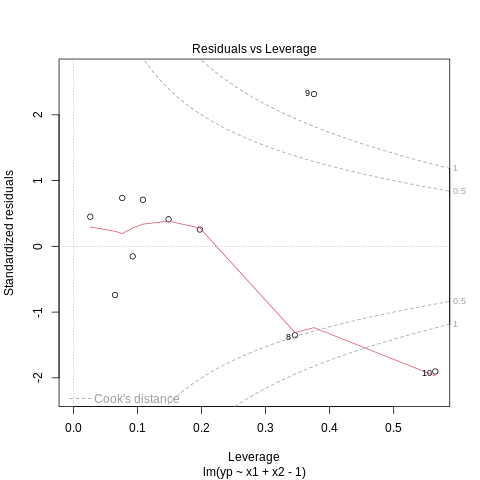

In [26]:
%%R
##
residuales = modelo3$residuals

## Q-Q plot
qqnorm(residuales)
qqline(residuales)

plot(modelo3)

# H_O: la distribucion es normla
# H_1: la distribucion no es normal

shapiro.test(residuales)
# alpha= 0.05

In [27]:
%%R
## Homocedasticidad


NULL


In [ ]:
%%R
